In [341]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [342]:
n_samples = 1000
X , y = make_circles(n_samples, noise=0.03,  random_state=43)

In [343]:
X.shape , y.shape

((1000, 2), (1000,))

In [344]:
import pandas as pd

df = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"Y":y})
df.head(5)

,X1,X2,Y
0,-0.124570,-0.785914,1
1,0.772370,-0.158252,1
2,-0.657123,0.768114,0
3,0.794009,0.051699,1
4,-0.642243,0.361384,1


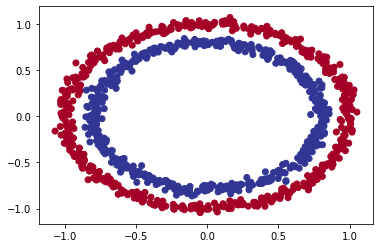

In [345]:
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap=plt.cm.RdYlBu)

In [346]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [347]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32).unsqueeze(dim = 1)
split_percentage = int(0.8*len(X))
X_train , y_train = X[:split_percentage], y[:split_percentage]
X_test,y_test = X[split_percentage:], y[split_percentage:]

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

print(y_train.shape)

torch.Size([800, 1])


In [348]:
class circle_model_v0(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer1 = nn.Linear(in_features=2,out_features=5)
        self.linear_layer2 = nn.Linear(in_features=5,out_features=1)
        
    def  forward(self,x : torch.tensor) -> torch.Tensor:
        return self.linear_layer2(self.linear_layer1(x))
    
def plotting(x,y,predictions = None):
    plt.scatter(x,y,c = "r")
    if predictions is not None:
        plt.scatter(x,predictions,c = "b")



In [349]:
model = circle_model_v0()
model.to(device)

circle_model_v0(
  (linear_layer1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [350]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188]], requires_grad=True),
 Parameter containing:
 tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], requires_grad=True),
 Parameter containing:
 tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], requires_grad=True),
 Parameter containing:
 tensor([-0.2060], requires_grad=True)]

In [351]:
model.state_dict()

OrderedDict([('linear_layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('linear_layer1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('linear_layer2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('linear_layer2.bias', tensor([-0.2060]))])

In [352]:
loss = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model.parameters(),lr = 0.01)

In [353]:
torch.manual_seed(42)
epochs  = 50
epoch_set = []
train_loss = []
test_loss = []
for epoch in range(epochs):
    model.train()
    y_preds = model(X_train)
  
    print(y_preds , y_preds.shape , y_test.shape)
    loss1 = loss(y_preds,y_train)
    optimizer.zero_grad()
    loss1.backward()
    optimizer.step()
    model.eval()
    epoch_set.append(epoch)
    train_loss.append(loss1.item())
    with torch.inference_mode():
        y_logits_test = model(X_test)
        loss2 = loss(y_logits_test,y_test)
        test_loss.append(loss2.item())
    print("Epoch: {}, Train Loss: {}, Test Loss: {}".format(epoch,loss1.item(),loss2.item()))
    
    
    
    

tensor([[-0.1907],
        [-0.1218],
        [-0.1343],
        [-0.1103],
        [-0.1542],
        [-0.1406],
        [-0.1007],
        [-0.1179],
        [-0.1444],
        [-0.1820],
        [-0.0809],
        [-0.1454],
        [-0.1842],
        [-0.1474],
        [-0.1873],
        [-0.1095],
        [-0.1363],
        [-0.0999],
        [-0.1090],
        [-0.1026],
        [-0.1920],
        [-0.0931],
        [-0.1194],
        [-0.0976],
        [-0.1929],
        [-0.2108],
        [-0.1800],
        [-0.0883],
        [-0.1707],
        [-0.1510],
        [-0.1484],
        [-0.2007],
        [-0.1927],
        [-0.0975],
        [-0.0996],
        [-0.1593],
        [-0.0842],
        [-0.0911],
        [-0.1603],
        [-0.2040],
        [-0.2112],
        [-0.1058],
        [-0.0970],
        [-0.1936],
        [-0.2069],
        [-0.1211],
        [-0.0947],
        [-0.1620],
        [-0.2093],
        [-0.1851],
        [-0.1739],
        [-0.1214],
        [-0.

In [354]:
def accuracy_fn(y_pred, y_true):
   correct = torch.eq(y_true,y_pred).sum().item()
   acc = (correct/len(y_pred)) * 100
   return acc

In [355]:
y_preds_test = torch.sigmoid(y_logits_test)
y_preds_test = torch.round(y_preds_test)
print(y_preds_test,y_logits_test)
accuracy_fn(y_preds_test, y_test)

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
      

42.0

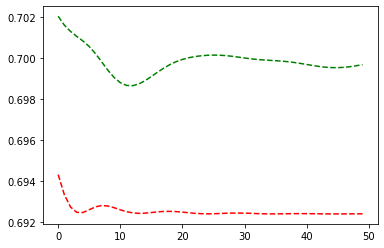

In [356]:
def plot_epoch_loss(epoch,loss,color):
    plt.plot(epoch,loss,color)
plot_epoch_loss(epoch_set,test_loss,color = "g--")
plot_epoch_loss(epoch_set,train_loss,color = "r--")

In [357]:
model.eval()
with torch.inference_mode():
    y_p = model(X_test)
    ll = loss(y_p,y_test)
    

In [358]:
torch.save(model.state_dict(),"models/circle_model_v0.pth")